<a href="https://colab.research.google.com/github/edwinmgallego/Best-README-Template/blob/main/Webscrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página
url = 'https://www.balotoresultados.co/historico'

# Obtener el contenido de la página
response = requests.get(url)
if response.status_code != 200:
    print(f'Error al acceder a la página: {response.status_code}')
    exit()

# Analizar el HTML con BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Buscar la tabla
table = soup.find('table')
if not table:
    print('No se encontró la tabla en la página.')
    exit()

# Extraer encabezados de la tabla
headers = [header.text.strip() for header in table.find_all('th')]

# Extraer los datos de la tabla
data = []
for row in table.find_all('tr')[1:]:  # Omitimos la primera fila que contiene los encabezados
    columns = row.find_all('td')
    if len(columns) == len(headers):
        cleaned_row = [column.text.strip().replace('\n', ', ') for column in columns]
        data.append(cleaned_row)

# Crear un DataFrame con Pandas
df = pd.DataFrame(data, columns=headers)

# Mostrar los primeros registros
display(df)

,Nro. Sorteo,Fecha,Números Baloto,Números Revancha,Ganadores y premios
0,2475,8/02/2025,"02, 09, 10, 39, 43, 14","04, 10, 12, 27, 40, 09",Baloto 2475
1,2474,5/02/2025,"05, 11, 14, 37, 38, 14","04, 07, 16, 18, 43, 02",Baloto 2474
2,2473,1/02/2025,"02, 04, 05, 28, 33, 12","05, 06, 19, 32, 37, 16",Baloto 2473
3,2472,29/01/2025,"12, 20, 26, 34, 38, 01","07, 12, 33, 36, 39, 10",Baloto 2472
4,2471,25/01/2025,"01, 16, 19, 25, 31, 06","10, 26, 37, 40, 42, 05",Baloto 2471
5,2470,22/01/2025,"12, 15, 28, 34, 37, 01","04, 15, 23, 27, 34, 13",Baloto 2470
6,2469,18/01/2025,"14, 19, 30, 38, 41, 10","01, 06, 07, 20, 41, 02",Baloto 2469
7,2468,15/01/2025,"07, 16, 32, 33, 43, 01","13, 22, 25, 32, 35, 10",Baloto 2468
8,2467,11/01/2025,"02, 28, 31, 32, 34, 06","09, 15, 23, 28, 39, 07",Baloto 2467
9,2466,8/01/2025,"18, 24, 27, 37, 43, 11","01, 05, 28, 36, 38, 05",Baloto 2466


Index(['Nro. Sorteo', 'Fecha', 'Números Baloto', 'Números Revancha',
       'Ganadores y premios'],
      dtype='object')


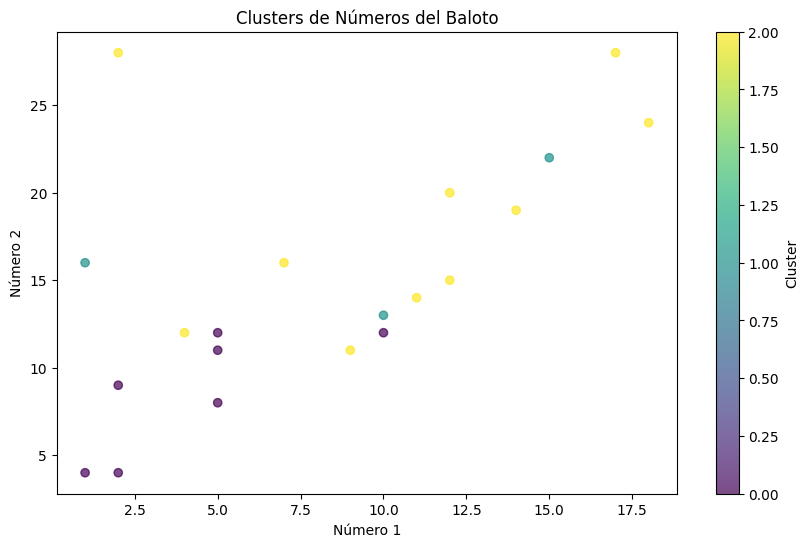

,Nro. Sorteo,Fecha,Números Baloto,Números Revancha,Ganadores y premios,Cluster
0,2475,8/02/2025,"[2, 9, 10, 39, 43, 14]","[4, 10, 12, 27, 40, 9]",Baloto 2475,0
1,2474,5/02/2025,"[5, 11, 14, 37, 38, 14]","[4, 7, 16, 18, 43, 2]",Baloto 2474,0
2,2473,1/02/2025,"[2, 4, 5, 28, 33, 12]","[5, 6, 19, 32, 37, 16]",Baloto 2473,0
3,2472,29/01/2025,"[12, 20, 26, 34, 38, 1]","[7, 12, 33, 36, 39, 10]",Baloto 2472,2
4,2471,25/01/2025,"[1, 16, 19, 25, 31, 6]","[10, 26, 37, 40, 42, 5]",Baloto 2471,1


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# URL de la página
url = 'https://www.balotoresultados.co/historico'

# Obtener el contenido de la página
response = requests.get(url)
if response.status_code != 200:
    print(f'Error al acceder a la página: {response.status_code}')
    exit()

# Analizar el HTML con BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Buscar la tabla
table = soup.find('table')
if not table:
    print('No se encontró la tabla en la página.')
    exit()

# Extraer encabezados de la tabla
headers = [header.text.strip() for header in table.find_all('th')]

# Extraer los datos de la tabla
data = []
for row in table.find_all('tr')[1:]:  # Omitimos la primera fila que contiene los encabezados
    columns = row.find_all('td')
    if len(columns) == len(headers):
        cleaned_row = [column.text.strip().replace('\n', ', ') for column in columns]
        data.append(cleaned_row)

# Crear un DataFrame con Pandas
df = pd.DataFrame(data, columns=headers)
print(df.columns)

# Convertir los números de las columnas a listas de enteros
def parse_numbers(column):
    return [[int(num) for num in row.split(', ')] for row in df[column]]

df['Números Baloto'] = parse_numbers('Números Baloto')
df['Números Revancha'] = parse_numbers('Números Revancha')

# Convertir las listas en columnas numéricas separadas
numbers_df = pd.DataFrame(df['Números Baloto'].to_list(), columns=[f'Num_{i+1}' for i in range(6)])  # 6 números en vez de 5
revancha_df = pd.DataFrame(df['Números Revancha'].to_list(), columns=[f'Rev_{i+1}' for i in range(6)])


# Concatenar los valores numéricos en un solo DataFrame para clustering
data_for_clustering = pd.concat([numbers_df, revancha_df], axis=1)

# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Aplicar K-Means para encontrar patrones
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualización de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_for_clustering.iloc[:, 0], data_for_clustering.iloc[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Número 1')
plt.ylabel('Número 2')
plt.title('Clusters de Números del Baloto')
plt.colorbar(label='Cluster')
plt.show()

# Mostrar los primeros registros
display(df.head())
